In [1]:
import dlib
import scipy.misc
import numpy as np
import os
from PIL import Image
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Get Face Detector from dlib
# This allows us to detect faces in images

face_detector = dlib.get_frontal_face_detector()

In [3]:
# Get Pose Predictor from dlib
# This allows us to detect landmark points in faces and understand the pose/angle of the face

shape_predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

In [4]:
# Get the face recognition model
# This is what gives us the face encodings (numbers that identify the face of a particular person)

face_recognition_model = dlib.face_recognition_model_v1('dlib_face_recognition_resnet_model_v1.dat')

In [5]:
# This is the tolerance for face comparisons
# The lower the number - the stricter the comparison
# To avoid false matches, use lower value
# To avoid false negatives (i.e. faces of the same person doesn't match), use higher value
# 0.5-0.6 works well

TOLERANCE = 0.55

In [6]:
# This function will take an image and return its face encodings using the neural network

def get_face_encodings(path_to_image):
    # Load image using scipy
    image = scipy.misc.imread(path_to_image)

    # Detect faces using the face detector
    detected_faces = face_detector(image, 1)

    # Get pose/landmarks of those faces
    # Will be used as an input to the function that computes face encodings
    # This allows the neural network to be able to produce similar numbers for faces of the same people, regardless of camera angle and/or face positioning in the image
    shapes_faces = [shape_predictor(image, face) for face in detected_faces]

    # For every face detected, compute the face encodings
    return [np.array(face_recognition_model.compute_face_descriptor(image, face_pose, 1)) for face_pose in shapes_faces]

In [7]:
# This function takes a list of known faces
def compare_face_encodings(known_faces, face):
    # Finds the difference between each known face and the given face (that we are comparing)
    # Calculate norm for the differences with each known face
    # Return an array with True/Face values based on whether or not a known face matched with the given face
    # A match occurs when the (norm) difference between a known face and the given face is less than or equal to the TOLERANCE value
    return (np.linalg.norm(known_faces - face, axis=1) <= TOLERANCE)

In [8]:
# This function returns the name of the person whose image matches with the given face (or 'Not Found')
# known_faces is a list of face encodings
# names is a list of the names of people (in the same order as the face encodings - to match the name with an encoding)
# face is the face we are looking for

def find_match(known_faces, names, face):
    # Call compare_face_encodings to get a list of True/False values indicating whether or not there's a match
    matches = compare_face_encodings(known_faces, face)

    # Return the name of the first match
    count = 0
    for match in matches:
        if match:
            return names[count]
        count += 1

    # Return not found if no match found
    return 'Not Found'

images/Sarah.jpg


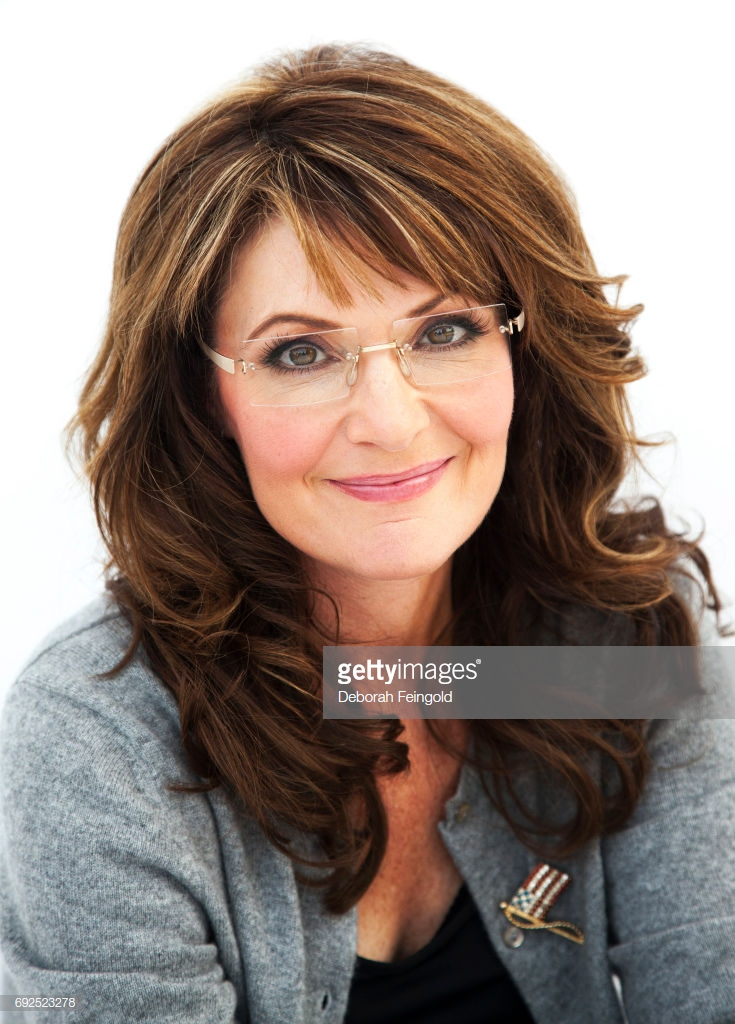

images/Tina.jpg


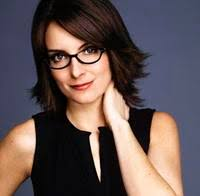

In [12]:
# Get path to all the known images
# Filtering on .jpg extension - so this will only work with JPEG images ending with .jpg
image_filenames = filter(lambda x: x.endswith('.jpg'), os.listdir('images/'))

# Sort in alphabetical order
image_filenames = sorted(image_filenames)

# Get full paths to images
paths_to_images = ['images/' + x for x in image_filenames]

# List of face encodings we have
face_encodings = []

# Loop over images to get the encoding one by one
for path_to_image in paths_to_images:
    # Get face encodings from the image
    face_encodings_in_image = get_face_encodings(path_to_image)

    # Make sure there's exactly one face in the image
    if len(face_encodings_in_image) != 1:
        print("Please change image: " + path_to_image + " - it has " + str(len(face_encodings_in_image)) + " faces; it can only have one")
        exit()

    # Append the face encoding found in that image to the list of face encodings we have
    face_encodings.append(get_face_encodings(path_to_image)[0])
    
    
    # Print the path of test image and the corresponding match
    print(path_to_image)
    display(Image.open(path_to_image))

test/Test(38).jpg Tina


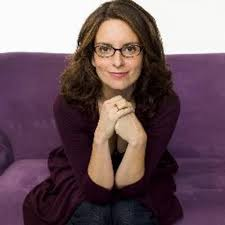

'Tina'

test/Test(37).jpg Tina


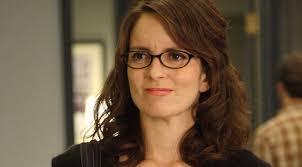

'Tina'

test/Test(45).jpg Not Found


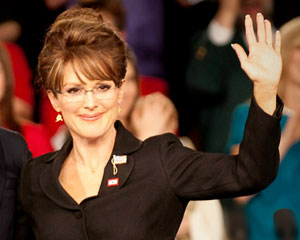

'Not Found'

test/Test(44).jpg Not Found


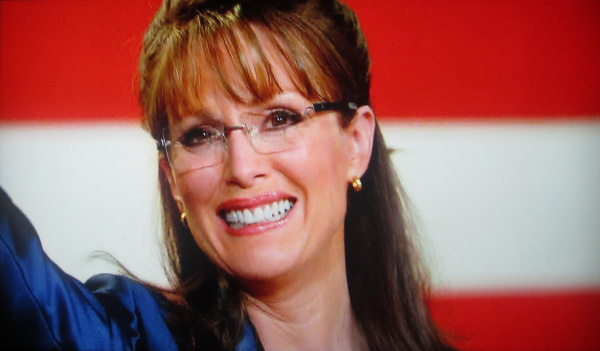

'Not Found'

test/Test(16).jpg Sarah


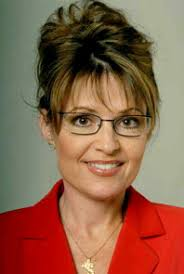

'Sarah'

test/Test(9).jpg Sarah


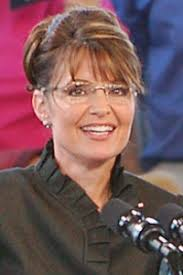

'Sarah'

test/Test(36).jpg Tina


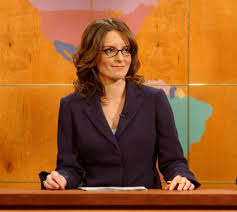

'Tina'

test/Test(33).jpg Not Found


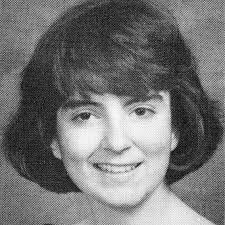

'Not Found'

test/Test(1).jpg Tina


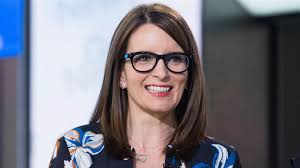

'Tina'

In [10]:
# Get path to all the test images
# Filtering on .jpg extension - so this will only work with JPEG images ending with .jpg
test_filenames = filter(lambda x: x.endswith('.jpg'), os.listdir('test/'))

# Get full paths to test images
paths_to_test_images = ['test/' + x for x in test_filenames]

# Get list of names of people by eliminating the .JPG extension from image filenames
names = [x[:-4] for x in image_filenames]

# Iterate over test images to find match one by one
for path_to_image in paths_to_test_images:
    # Get face encodings from the test image
    face_encodings_in_image = get_face_encodings(path_to_image)

    # Make sure there's exactly one face in the image
    if len(face_encodings_in_image) != 1:
        print("Please change image: " + path_to_image + " - it has " + str(len(face_encodings_in_image)) + " faces; it can only have one")
        exit()

    # Find match for the face encoding found in this test image
    match = find_match(face_encodings, names, face_encodings_in_image[0])

    # Print the path of test image and the corresponding match
    print(path_to_image, match)
    display(Image.open(path_to_image), match)